In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import somoclu
%matplotlib inline 

In [3]:
# Our data
data_bei = pd.read_csv('BeijingPM2.csv')
data_chen = pd.read_csv('ChengduPM20.csv')
data_guan = pd.read_csv('GuangzhouPM20.csv')
data_shan = pd.read_csv('ShanghaiPM20.csv')
data_shen = pd.read_csv('ShenyangPM20.csv')

datasets = [
    
    data_bei,
    data_chen,
    data_guan,
    data_shan,
    data_shen,
    
]

# describes our datasets

for i, u in enumerate(datasets):
    datasets[i] = u.dropna()
#     print('\ndatasets {}: {}'.format(i, u))
        
for i, data in enumerate(datasets):
    pollution_first = data.iloc[:, 6]
    pollution_second = data.iloc[:, 7]
    pollution_third = data.iloc[:, 8]
    PM = data.iloc[:, 6:9]
    
    if i == 0:
        pollution_fourth = data.iloc[:, 9]
        common_polution = (pollution_first + pollution_second + pollution_third + pollution_fourth) / 4
    else:
        common_polution = (pollution_first + pollution_second + pollution_third) / 3
        
    del datasets[i]['cbwd']
    del datasets[i]['No']
    datasets[i]['average_PM'] = common_polution

for i, data in enumerate(datasets):
    if i == 0:
        datasets[i] = data.drop(data.columns[[5, 6, 7, 8]], axis=1)
    else:
        datasets[i] = data.drop(data.columns[[5, 6, 7]], axis=1)
union = pd.concat(datasets, ignore_index=True)

labels = range(100685)

/home/valyay/.local/lib/python3.5/site-packages/ipykernel_launcher.py:38: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


In [4]:
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler(feature_range = (0, 1))
data = sc.fit_transform(union)
print(np.shape(union))

(100684, 13)


/home/valyay/.local/lib/python3.5/site-packages/sklearn/preprocessing/data.py:334: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)


In [5]:
n_rows, n_columns = 40,40
som = somoclu.Somoclu(n_columns, n_rows, data=data, maptype="planar")
som.train(epochs=10,radius0=38, radiusN=1,radiuscooling="exponential",scale0=0.1, scaleN=0.035, scalecooling="exponential")

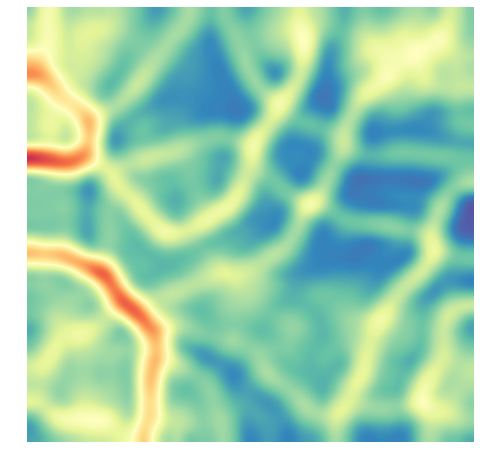

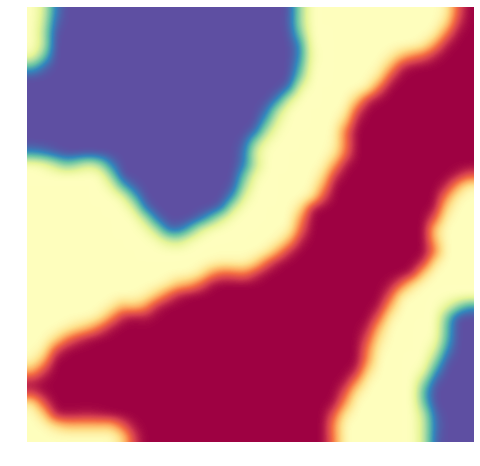

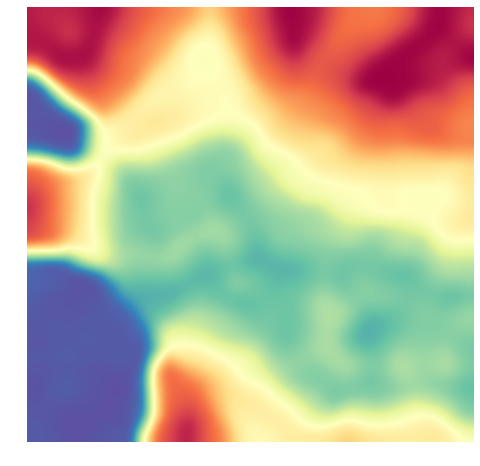

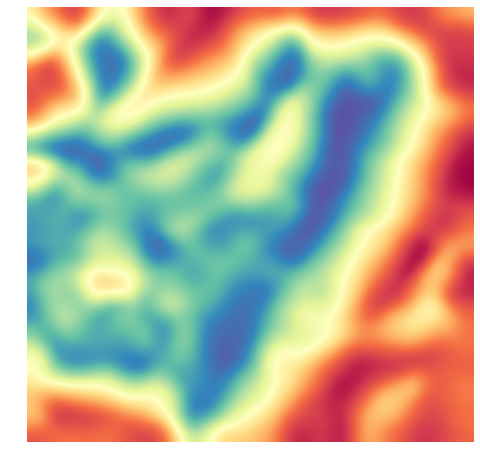

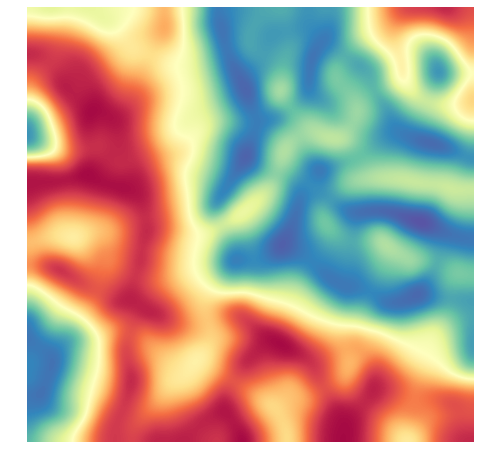

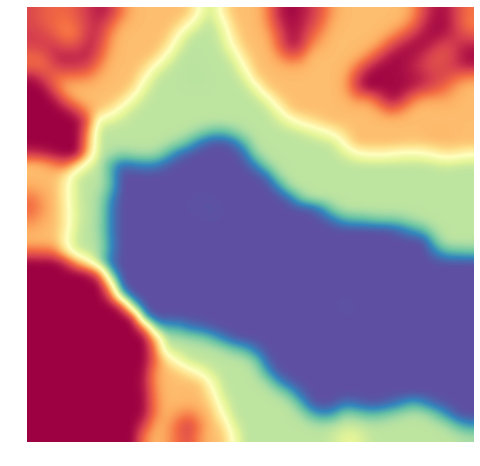

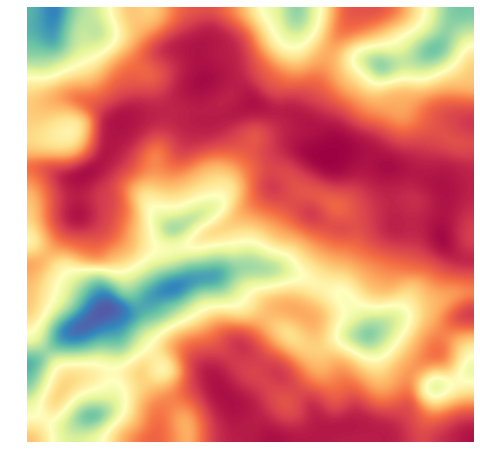

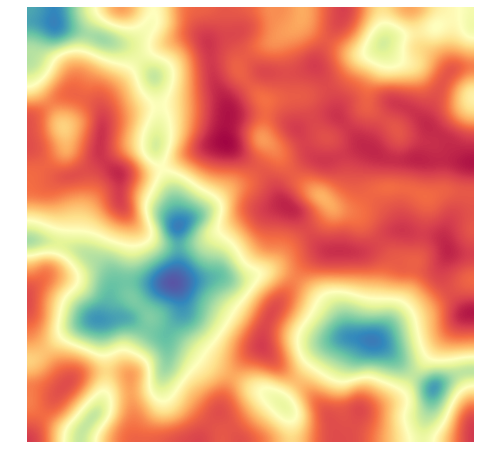

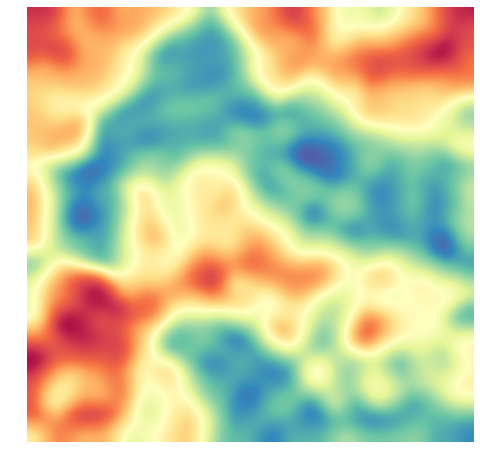

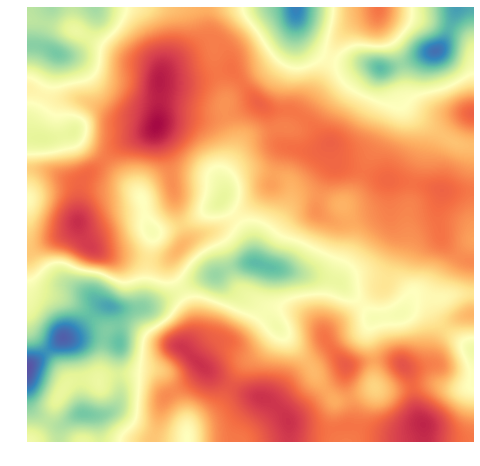

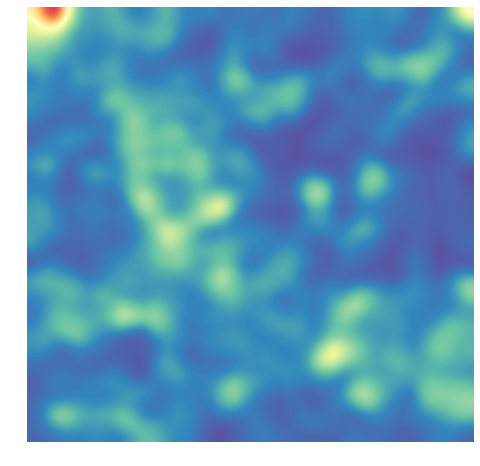

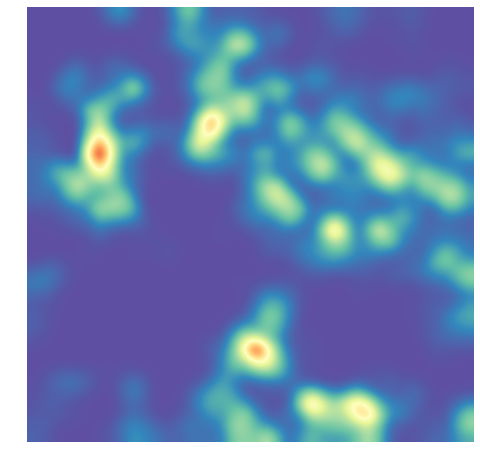

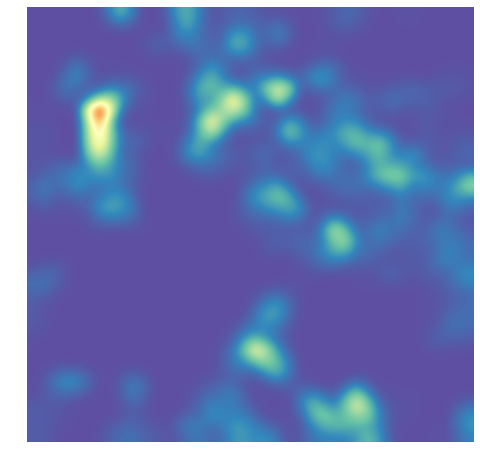

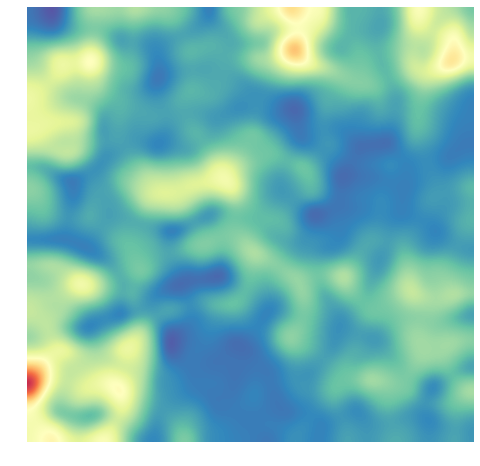

<module 'matplotlib.pyplot' from '/home/valyay/.local/lib/python3.5/site-packages/matplotlib/pyplot.py'>

In [9]:
som.view_umatrix()
som.view_component_planes()

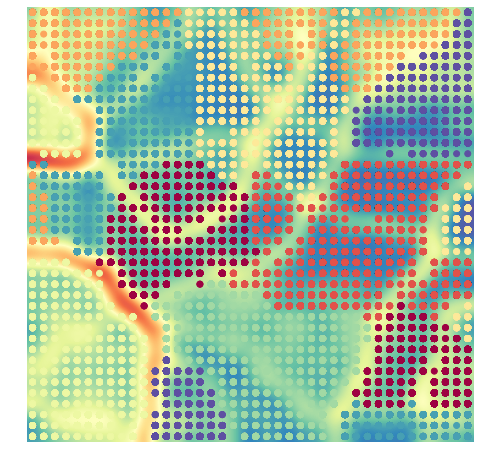

<module 'matplotlib.pyplot' from '/home/valyay/.local/lib/python3.5/site-packages/matplotlib/pyplot.py'>

In [11]:
som.cluster()
som.view_umatrix(bestmatches=True)

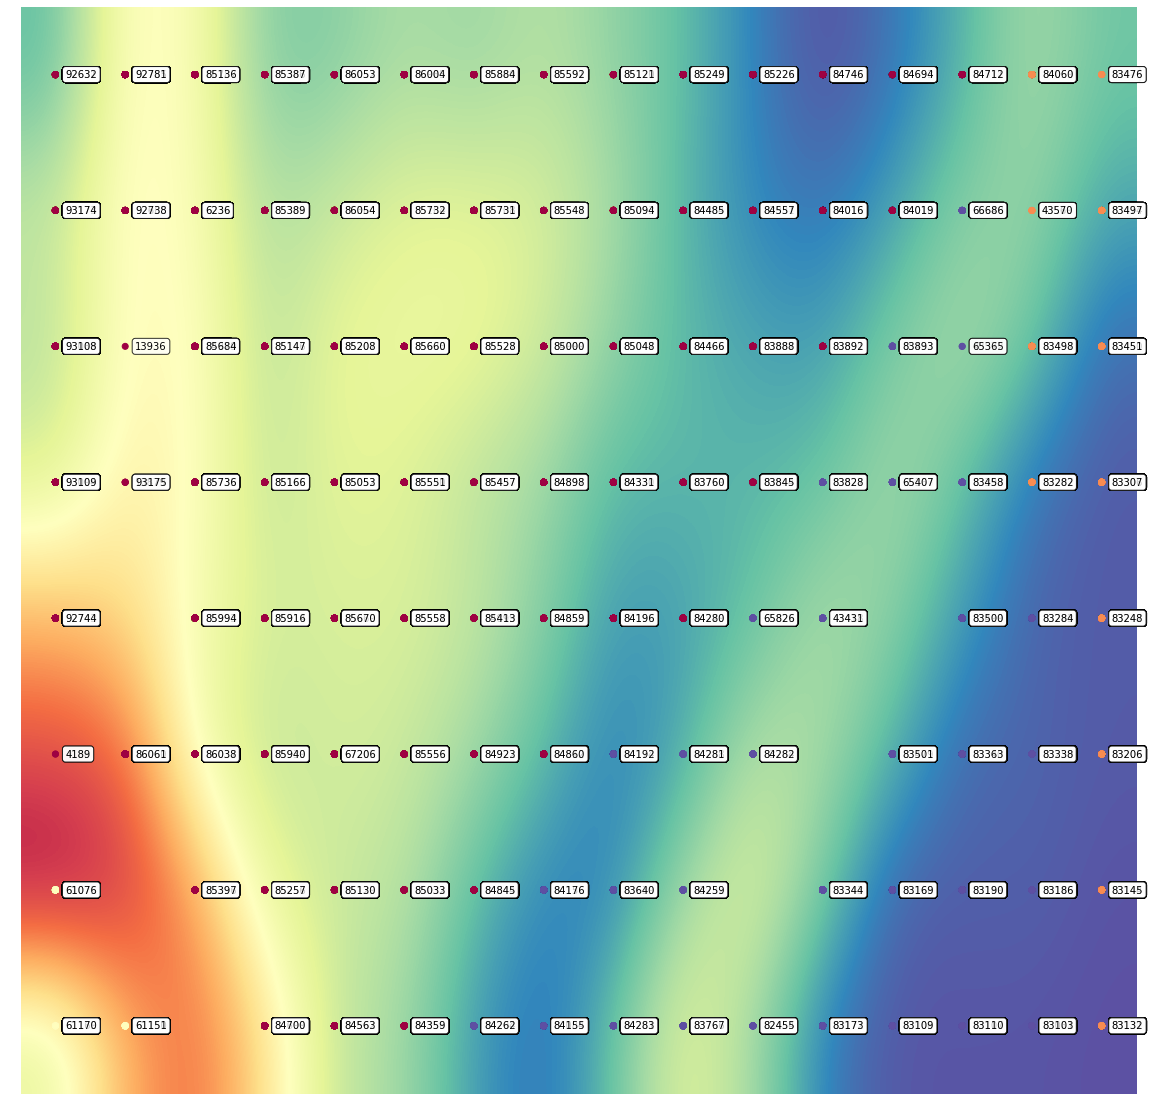

<module 'matplotlib.pyplot' from '/home/valyay/.local/lib/python3.5/site-packages/matplotlib/pyplot.py'>

In [16]:
som.view_umatrix(bestmatches=True,labels=labels, zoom=((0, 8), (0, 16)), figsize=(20,20))

In [17]:
%time som.train(epochs=15000,radius0=1,radiusN=0.000001,radiuscooling="exponential",scale0=0.035, scaleN=0.001, scalecooling="exponential")

CPU times: user 1d 10h 58min 24s, sys: 1min, total: 1d 10h 59min 24s
Wall time: 8h 53min 51s


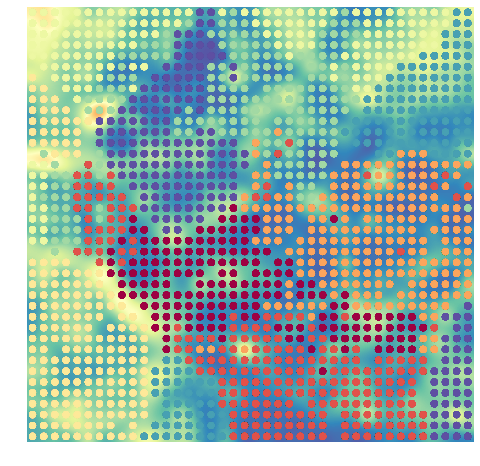

<module 'matplotlib.pyplot' from '/home/valyay/.local/lib/python3.5/site-packages/matplotlib/pyplot.py'>

In [18]:
som.cluster()
som.view_umatrix(bestmatches=True)

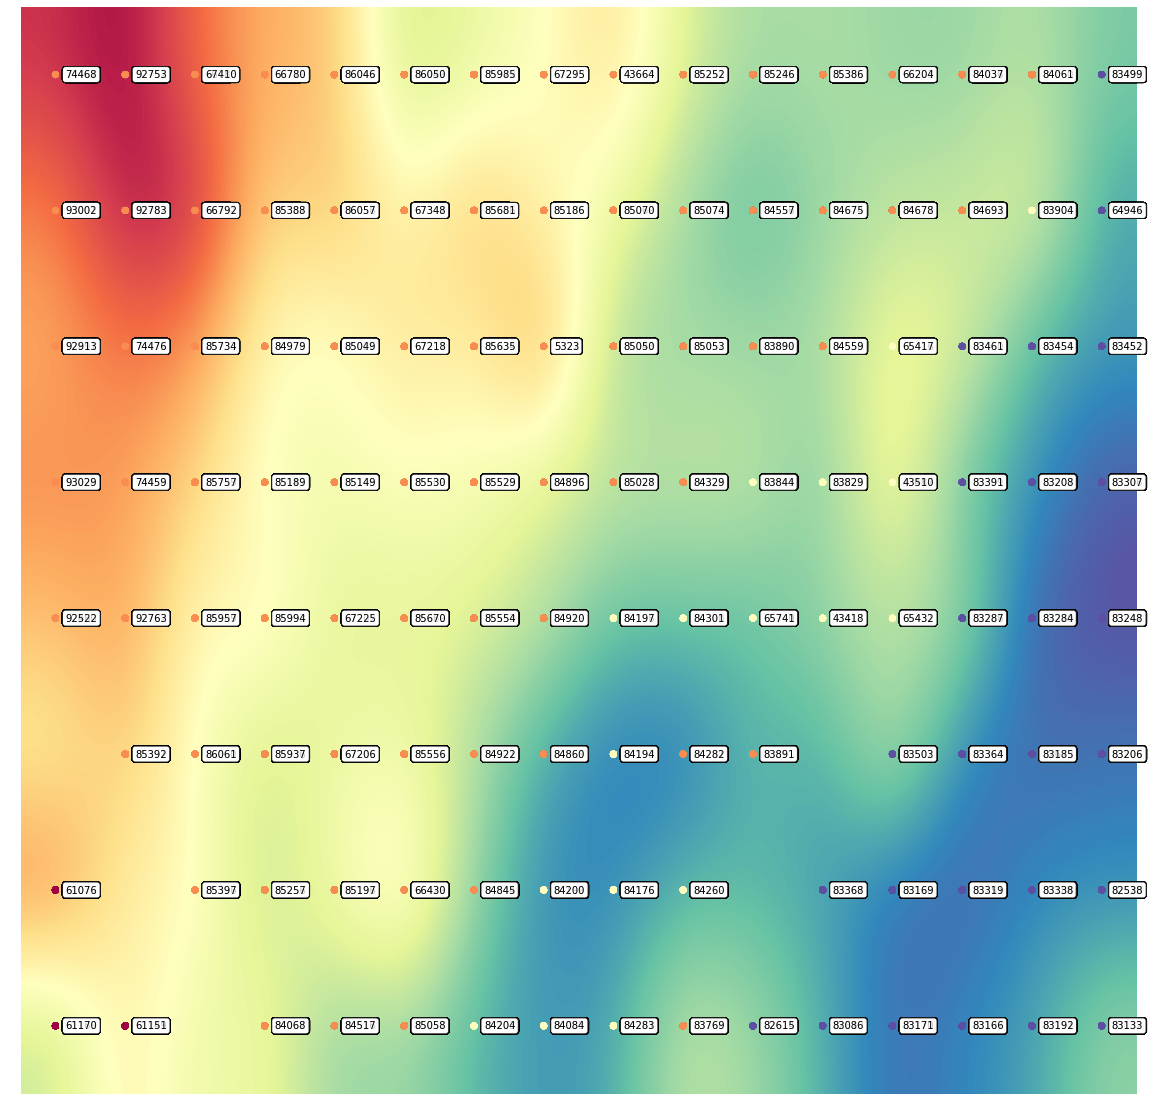

<module 'matplotlib.pyplot' from '/home/valyay/.local/lib/python3.5/site-packages/matplotlib/pyplot.py'>

In [19]:
som.view_umatrix(bestmatches=True,labels=labels, zoom=((0, 8), (0, 16)), figsize=(20,20))